## Clasificación de pixeles 

Utilize los datos de entrenamiento de CNN con 578 imagenes de resolucion de 30 metros, por lo que cada imagen es de 300 por 300 pixeles. 

Si cada pixel es un fila tengo aprox 50 millones de filas. 

- Clase 1 : presencia de Pinus radiata 

- Clase 0 : ausencia de Pinus radiata 


Columnas : canales Red, Green, Blue del pixel de las imagenes 

In [2]:
import numpy as np
import pandas as pd
data=pd.read_csv("dataset_pixeles.csv")
data

,clase,red,green,blue
0,1,97.0,110.0,73.0
1,1,77.0,89.0,59.0
2,1,45.0,56.0,49.0
3,1,40.0,57.0,53.0
4,1,44.0,61.0,60.0
...,...,...,...,...
52019995,0,98.0,110.0,82.0
52019996,0,103.0,111.0,79.0
52019997,0,94.0,104.0,68.0
52019998,0,70.0,83.0,53.0


<AxesSubplot:xlabel='clase', ylabel='count'>

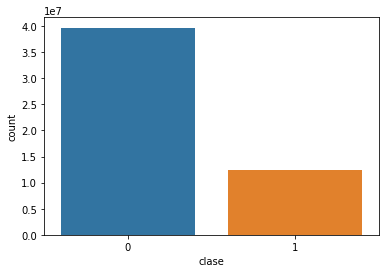

In [4]:
import seaborn as sns
sns.countplot(data=data, x="clase")

In [5]:
import collections
counter = collections.Counter(data["clase"])
print(counter)

Counter({0: 39686413, 1: 12333587})


### Submuestra del los datos balanceada.

In [6]:
df1 = data[data.clase==1].sample(500000)
df0 = data[data.clase==0].sample(500000)
data_balance = pd.concat([df1,df0])
contar = collections.Counter(data_balance["clase"])
print(contar)

Counter({1: 500000, 0: 500000})


## Estandarización de los datos 

In [8]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
X = data_balance.drop(["clase"], axis=1)
y = data_balance["clase"]
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler() 
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Clasificador con KNN 

In [9]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68    124910
           1       0.68      0.69      0.68    125090

    accuracy                           0.68    250000
   macro avg       0.68      0.68      0.68    250000
weighted avg       0.68      0.68      0.68    250000



## Clasificador con Ranfom Forest 

In [11]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train, y_train) 

y_pred_RF = model1.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67    124910
           1       0.67      0.70      0.69    125090

    accuracy                           0.68    250000
   macro avg       0.68      0.68      0.68    250000
weighted avg       0.68      0.68      0.68    250000

